# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data)*

In [ ]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("ford_data.csv")
df

,year,mileage,tax,mpg,engineSize,price
0,2017,15944,150,57.7,1.0,12000
1,2018,9083,150,57.7,1.0,14000
2,2017,12456,150,57.7,1.0,13000
3,2019,10460,145,40.3,1.5,17500
4,2019,1482,145,48.7,1.0,16500
...,...,...,...,...,...,...
17960,2017,16700,150,47.1,1.4,8999
17961,2014,40700,30,57.7,1.0,7499
17962,2015,7010,20,67.3,1.6,9999
17963,2018,5007,145,57.7,1.2,8299


In [ ]:
# Schritt 2: Analysiere die Daten mithilfe von '.describe()'

df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,23360.858447,113.324353,57.907821,1.350804,12279.856833
std,2.024978,19471.182902,62.010410,10.125350,0.432379,4741.279186
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.000000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31048.000000,145.000000,65.700000,1.500000,15299.000000
max,2020.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


# Daten aufteilen

In [ ]:
# Schritt 3: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.

X = df.copy()
y = X.pop("price")

In [ ]:
X

,year,mileage,tax,mpg,engineSize
0,2017,15944,150,57.7,1.0
1,2018,9083,150,57.7,1.0
2,2017,12456,150,57.7,1.0
3,2019,10460,145,40.3,1.5
4,2019,1482,145,48.7,1.0
...,...,...,...,...,...
17960,2017,16700,150,47.1,1.4
17961,2014,40700,30,57.7,1.0
17962,2015,7010,20,67.3,1.6
17963,2018,5007,145,57.7,1.2


In [ ]:
y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17960,8999
17961,7499
17962,9999
17963,8299


In [ ]:
!pip install scikit-learn==1.5.2
from sklearn.model_selection import train_test_split

# Schritt 4: Unterteile die Daten in Trainings- und Testdaten, wobei die Testdaten 20% der Gesamtdaten ausmachen sollten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,year,mileage,tax,mpg,engineSize
7219,2014,26611,0,65.7,1.0
3257,2018,8169,145,53.3,1.0
14535,2019,3914,145,60.1,1.0
4436,2017,20962,125,53.3,1.0
14091,2016,32000,0,65.7,1.0
...,...,...,...,...,...
9225,2016,53530,0,74.3,1.5
13123,2017,26806,160,44.1,1.6
9845,2015,18136,0,88.3,1.5
10799,2018,10435,145,54.3,1.5


In [ ]:
y_train

,price
7219,7490
3257,13091
14535,15500
4436,10991
14091,6990
...,...
9225,8440
13123,9000
9845,9800
10799,16999


# Random Forest Regressor - Hyperparameteroptimierung mit GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Schritt 5: Erstelle eine Instanz eines RandomForestRegressors und erstelle jeweils eine Liste mit verschiedenen Werten für 'n_estimators' und 'max_depth'.
rf_model = RandomForestRegressor(random_state=0)
param_grid = {
    'n_estimators': [300, 350],
    'max_depth': [12, 13]
}

# Schritt 6: Setze bei GridSearchCV die Anzahl an Folds auf 4 und scoring auf "neg_mean_absolute_error".
grid_search = GridSearchCV(rf_model, param_grid, cv=4, scoring="neg_mean_absolute_error")
grid_search.fit(X_train, y_train)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Mean Absolute Error:  935.8770879007243
Best Parameters:  {'max_depth': 12, 'n_estimators': 300}


# Random Forest Regressor - Finales Modell

In [ ]:
from sklearn.metrics import mean_absolute_error

# Schritt 7: Speichere den besten RandomForestRegressor in 'final_rf_model' ab mithilfe von '.best_estimator_' und berechne den finalen MAE auf den Testdaten.
final_rf_model = grid_search.best_estimator_
y_predict_final = final_rf_model.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

Final MAE: 946.4951415689363


# XGBoost - Hyperparameteroptimierung mit GridSearchCV

In [ ]:
from xgboost import XGBRegressor

# Schritt 8: Erstelle eine Instanz eines XGBRegressors und erstelle eine Liste mit verschiedenen Werten für 'max_depth'.
xgb_model = XGBRegressor(random_state=0)
param_grid = {
    'max_depth': [5, 6, 7, 8]
}

# Schritt 9: Erstelle eine Instanz von GridSearchCV und setze die Anzahl an Folds auf 4 und scoring auf "neg_mean_absolute_error".
grid_search = GridSearchCV(xgb_model, param_grid, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Mean Absolute Error:  930.8744515541898
Best Parameter:  {'max_depth': 6}


# Early Stopping, um *n_estimators* besser zu bestimmen

In [ ]:
# Schritt 10: Teile die Trainingsdaten wieder in neue Trainings- und Validierungsdaten auf, wobei die Validierungsdaten 20% der Trainingsdaten ausmachen sollten.
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Schritt 11: Erstelle eine Instanz von XGBRegressor und setze 'n_estimators' auf einen extrem hohen Wert und 'max_depth' auf den optimalen Wert, der zuvor ermittelt wurde.
es_xgb_model = XGBRegressor(n_estimators=5000, max_depth=6, eval_metric="mae", early_stopping_rounds=70, random_state=0)
es_xgb_model.fit(X_train_new, y_train_new,
             eval_set=[(X_train_new, y_train_new), (X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=70,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

# Besten Wert für *n_estimators* ausgeben:

In [ ]:
# Schritt 12: Gib den besten Wert für 'n_estimators' aus.
# Tipp: Verwende '.best_iteration'.

print("Best value for n_estimators: ", es_xgb_model.best_iteration)

Best value for n_estimators:  104


# Ergebnisse visualisieren

In [ ]:
# Schritt 13: Speichere die Evaluierungsfehler von EarlyStopping in results ab.
# Tipp: Verwende '.evals_result()'

results = es_xgb_model.evals_result()
errors_df = pd.DataFrame({
    "Train Error": results["validation_0"]["mae"],
    "Valid Error": results["validation_1"]["mae"],
})
errors_df

,Train Error,Valid Error
0,2769.159396,2785.231720
1,2128.010604,2151.640218
2,1712.842330,1746.583848
3,1435.152283,1476.492814
4,1257.919833,1311.905533
...,...,...
170,654.887223,935.639593
171,653.380302,936.703209
172,651.965752,936.380941
173,650.886244,936.380338


Text(0, 0.5, 'MAE')

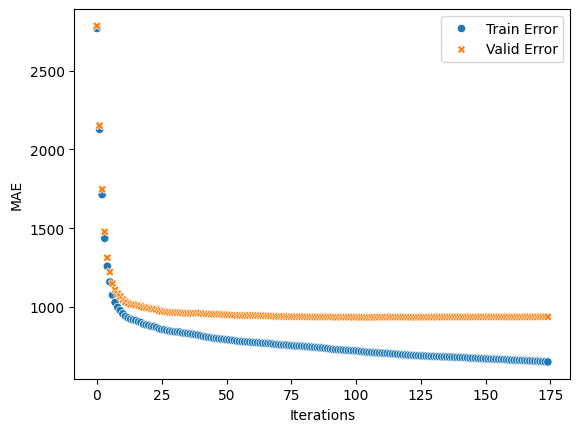

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 14: Visualisiere die Evaluierungsfehler mithilfe von seaborn.
sns.scatterplot(errors_df)
plt.xlabel("Iterations")
plt.ylabel("MAE")

# XGBoost Regressor - Finales Modell

In [ ]:
# Schritt 15: Erstelle eine finale Instanz von XGBRegressor mit den optimalen Werten für 'n_estimators' und 'max_depth', die zuvor ermittelt wurden.

final_xgb_model = XGBRegressor(n_estimators=104, max_depth=6, random_state=0)

In [ ]:
# Schritt 16: Trainiere das finale Modell ein letztes Mal auf allen Trainingsdaten und berechne den MAE auf den Testdaten.

final_xgb_model.fit(X_train, y_train)
y_predict_final = final_xgb_model.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

Final MAE: 942.6318145165893
